In [1]:
from sklearn.linear_model import LogisticRegression
import scipy.io
import numpy as np
import h5py
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load Data

In [2]:
#load data
dataset = 'Botswana'

if dataset == 'IndianPines':
    data = h5py.File('/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/Final Project/DRL4BS/data4classification/indian_pines_randomSampling_0.1_run_1.mat', 'r')
    selected_bands = scipy.io.loadmat('/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/Final Project/DRL4BS/results/drl_30_bands_indian_pines.mat')
elif dataset == 'Botswana':
    #data = h5py.File('/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/Final Project/DRL4BS/data4classification/botswana_randomSampling_0.1_run_1.mat', 'r')
    data = scipy.io.loadmat('/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/Final Project/DRL4BS/data4classification/botswana_randomSampling_0.1_run_1.mat')
    selected_bands = scipy.io.loadmat('/Users/romitbarua/Documents/Berkeley/Fall 2022/CS285-Deep Reinforcement Learning/Final Project/DRL4BS/results/drl_30_bands_botswana.mat')
    

In [3]:
if dataset == 'IndianPines':
    x_train = np.array(data['x_tra']).transpose()
    y_train = np.argmax(np.array(data['y_tra']).transpose(), axis=1)
    x_test = np.array(data['x_test']).transpose()
    y_test = np.argmax(np.array(data['y_test']).transpose(), axis=1)

elif dataset == 'Botswana':
    x_train = np.array(data['x_tra'])
    y_train = np.argmax(np.array(data['y_tra']), axis=1)
    x_test = np.array(data['x_test'])
    y_test = np.argmax(np.array(data['y_test']), axis=1)
        
selected_bands = selected_bands['selected_bands'][0].astype(int)

In [4]:
def runEvalModel(x_train, y_train, x_test, y_test):
    
    #model = LogisticRegression(multi_class='multinomial')
    model = KNeighborsClassifier()
    #model = RandomForestClassifier()
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_true=y_test, y_pred=pred)
    
    return accuracy
    
    

In [5]:
y_test.shape

(2917,)

In [6]:
#running the model using all available bands
print(runEvalModel(x_train, y_train, x_test, y_test))

0.8594446348988687


In [7]:
selected_bands

array([  5,  16,  32,  50,  38,  47,  27,  78,  26,  37,   3, 142,  24,
        72,  64,  31,  28,  74, 101,  30, 117,  85, 109,  19,  55,  33,
        73,  36,  56,  52])

In [8]:
#running the model using researchers selected bands
x_train_researchers_bands = x_train[:, selected_bands]
x_test_researchers_band = x_test[:, selected_bands]
print(runEvalModel(x_train_researchers_bands, y_train, x_test_researchers_band, y_test))

0.8659581762084333


In [9]:
#random selection
acc = []
available_bands = np.arange(0, x_train.shape[1], 1)
iterations = 200
for i in range(iterations):
    
    sample_bands = np.random.choice(available_bands, 30, replace=False)
    
    x_train_random_bands = x_train[:, sample_bands]
    x_test_random_bands = x_test[:, sample_bands]
    acc.append(runEvalModel(x_train_random_bands, y_train, x_test_random_bands, y_test))

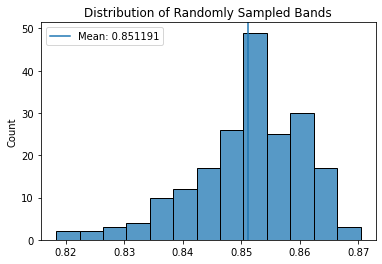

In [10]:
mean_acc = np.mean(acc)

sns.histplot(acc)
plt.axvline(mean_acc, label=f'Mean: {mean_acc:.6f}')
plt.title('Distribution of Randomly Sampled Bands')
plt.legend()
plt.show()

In [11]:
x_train.shape

(331, 145)

In [12]:
x_train_first_bands = x_train[:, 30:60]
x_test_first_bands = x_test[:, 30:60]
runEvalModel(x_train_first_bands, y_train, x_test_first_bands, y_test)

0.6479259513198492

In [13]:
sample_test = np.array([130, 25,  39, 194,  97,   4, 101,  88,  67,  54,  90,  37, 182,  73,  15,  75, 153, 100,
  10,  55, 158,  35, 166,   2, 167, 175,  98,  85,  34, 174])



x_train_first_bands = x_train[:, sample_test]
x_test_first_bands = x_test[:, sample_test]
runEvalModel(x_train_first_bands, y_train, x_test_first_bands, y_test)

IndexError: index 194 is out of bounds for axis 1 with size 145

In [ ]:
x_train_first_bands.shape